<a href="https://colab.research.google.com/github/Leegyu66/Computer-Vision/blob/master/Yolo/Yolo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip uninstall -y tensorflow keras # yolov3 버전에 tensorflow버전을 맞추기 위해 삭제

Found existing installation: tensorflow 2.11.0
Uninstalling tensorflow-2.11.0:
  Successfully uninstalled tensorflow-2.11.0
Found existing installation: keras 2.11.0
Uninstalling keras-2.11.0:
  Successfully uninstalled keras-2.11.0


In [4]:
!git clone https://github.com/zzh8829/yolov3-tf2 # yolov3 클론
%cd yolov3-tf2/ # yolov3로 change directory
!pip install -r requirements-gpu.txt # gpu 설정
!pip install keras==2.4.2 # keras 버전 맞추기기

Cloning into 'yolov3-tf2'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 442 (delta 3), reused 0 (delta 0), pack-reused 433
Receiving objects: 100% (442/442), 4.24 MiB | 20.69 MiB/s, done.
Resolving deltas: 100% (251/251), done.
[Errno 2] No such file or directory: 'yolov3-tf2/ # yolov3로 change directory'
/content
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements-gpu.txt'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.0/170.0 KB 5.1 MB/s eta 0:00:00


In [5]:
!wget https://pjreddie.com/media/files/yolov3.weights -O data/yolov3.weights # 가중치 가져오기
!python convert.py --weights ./data/yolov3.weights --output ./checkpoints/yolov3.tf

data/yolov3.weights: No such file or directory
python3: can't open file 'convert.py': [Errno 2] No such file or directory


## Detector

In [6]:
import time
import cv2
import numpy as np
import tensorflow as tf
 
from yolov3_tf2.models import YoloV3
from yolov3_tf2.dataset import transform_images, load_tfrecord_dataset
from yolov3_tf2.utils import draw_outputs
from absl import app, logging, flags
from absl.flags import FLAGS

from keras.preprocessing import image
import matplotlib.pyplot as pyplot
from IPython.display import Image, display

ModuleNotFoundError: ignored

In [ ]:
for name in list(flags.FLAGS):
      delattr(flags.FLAGS,name)

flags.DEFINE_string('classes', './data/coco.names', 'classes file')
flags.DEFINE_string('weights', './checkpoints/yolov3.tf', 'weights file')
flags.DEFINE_boolean('tiny', False, 'yolov3 or yolov3-tiny')
flags.DEFINE_integer('size', 416, 'resize images to')
flags.DEFINE_string('image', './data/girl.png', 'input image')
flags.DEFINE_string('tfrecord', None, 'tfrecord')
flags.DEFINE_string('output', './output.jpg', 'output image')
flags.DEFINE_integer('num_classes', 80, 'number of classes')

app._run_init(['yolov3'], app.parse_flags_with_usage)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
app._run_init(['yolov3'], app.parse_flags_with_usage)

In [7]:
# yolov5
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15287, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 15287 (delta 21), reused 29 (delta 7), pack-reused 15236
Receiving objects: 100% (15287/15287), 14.24 MiB | 25.66 MiB/s, done.
Resolving deltas: 100% (10475/10475), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, which is not installed.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 67.4.0 which is incompati

In [8]:
!ls data/images

bus.jpg  zidane.jpg


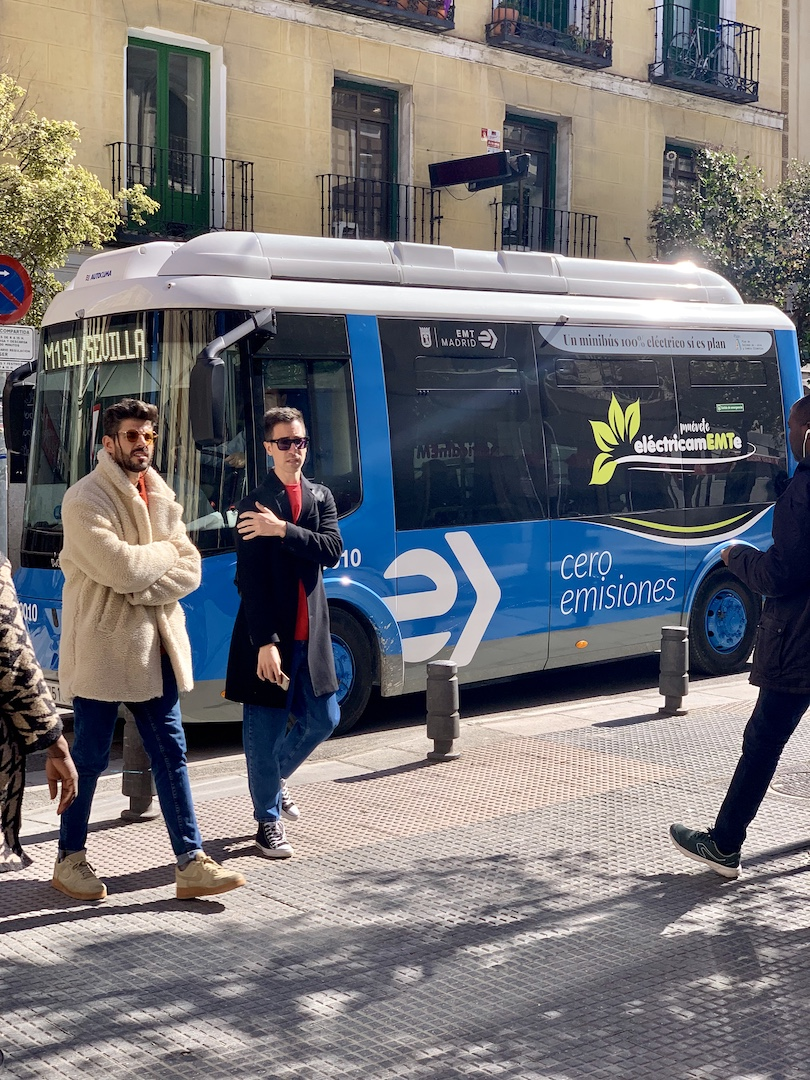

In [9]:
Image(filename='data/images/bus.jpg', width=600)

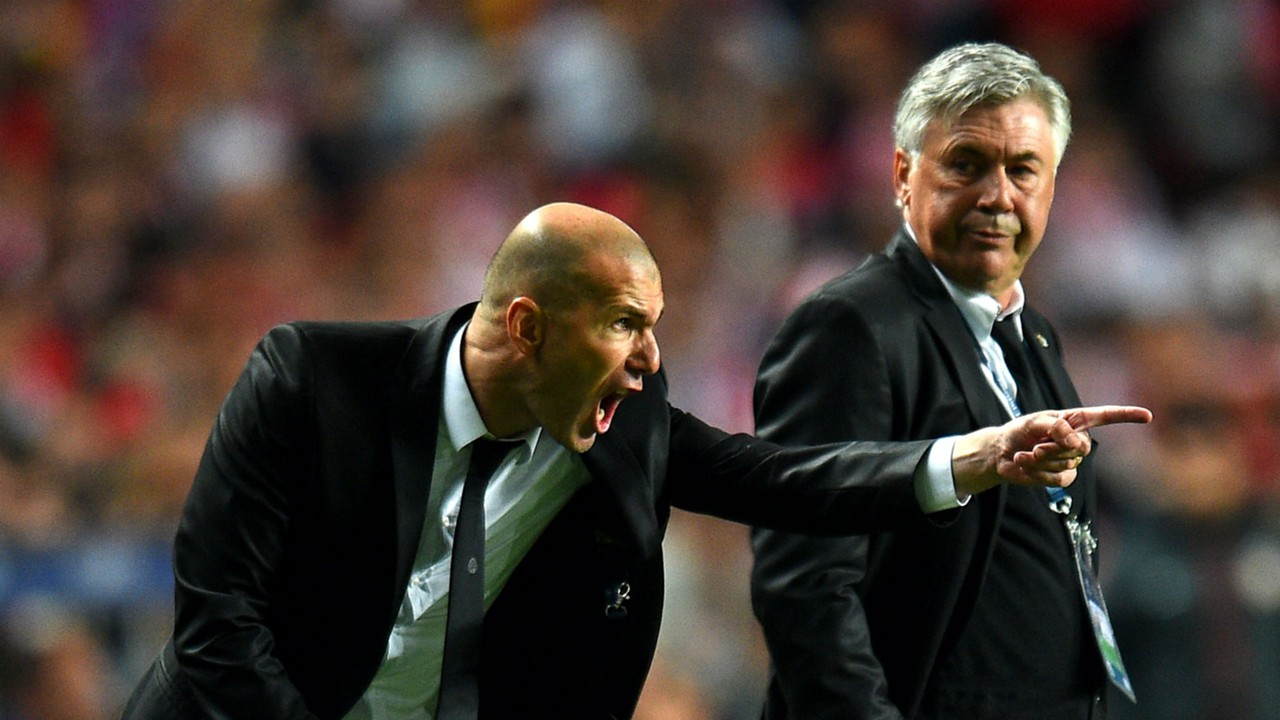

In [10]:
Image(filename='data/images/zidane.jpg', width=600)

In [11]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/

detect: weights=['yolov5s.pt'], source=data/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:01<00:00, 9.45MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 22.1ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 19.8ms
Speed: 0.5ms pre-process, 21.0ms inference, 22.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


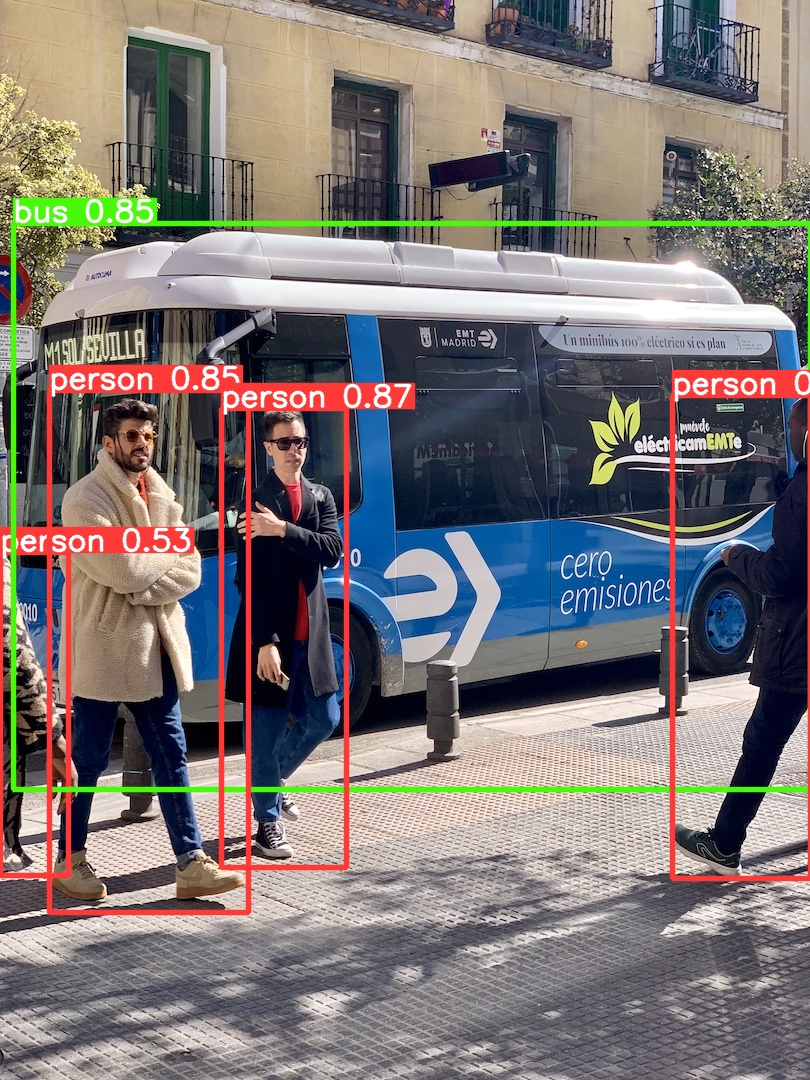

In [12]:
Image(filename='runs/detect/exp/bus.jpg', width=600)

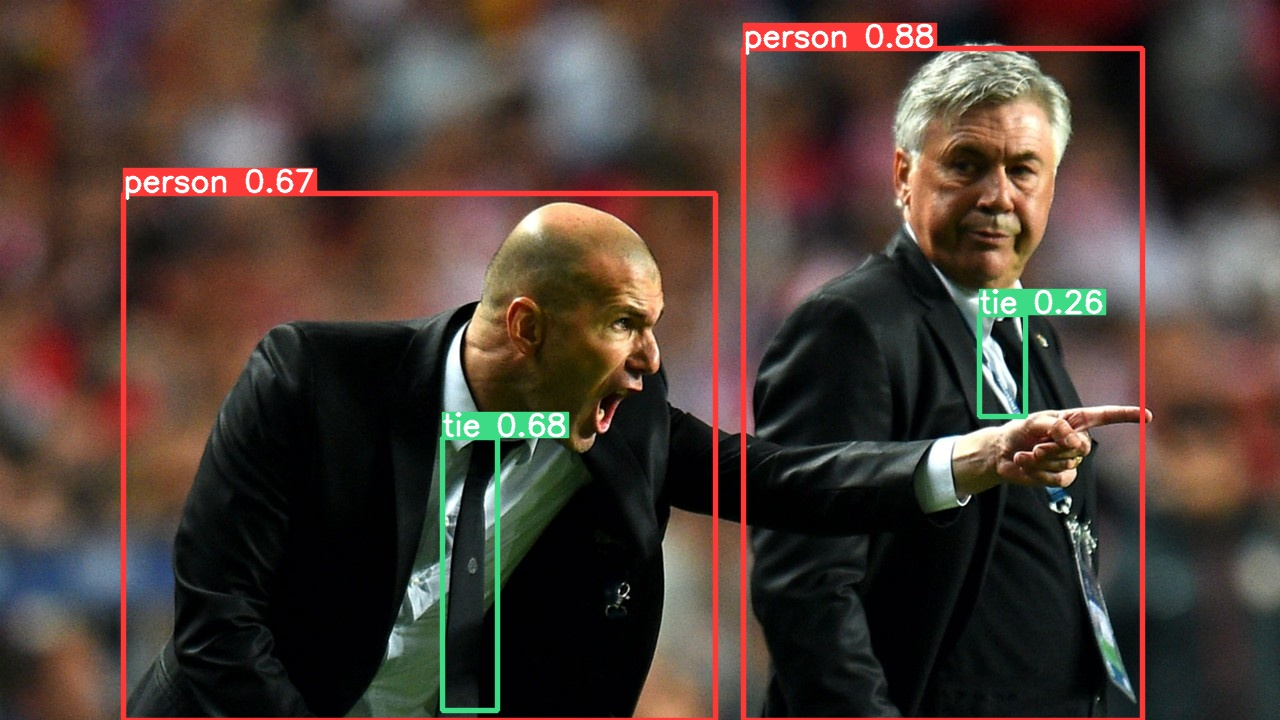

In [13]:
Image(filename='runs/detect/exp/zidane.jpg', width=600)

- 포트홀 데이터셋셋

In [14]:
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole

!curl -L "https://public.roboflow.com/ds/M1qiXBdsER?key=SP3yEI0TUt" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/yolov5/pothole
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3969      0 --:--:-- --:--:-- --:--:--  3986
100 46.0M  100 46.0M    0     0  65.4M      0 --:--:-- --:--:-- --:--:-- 65.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 ext

In [15]:
from glob import glob

train_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')
test_img_list = glob('/content/yolov5/pothole/test/images/*.jpg')
valid_img_list = glob('/content/yolov5/pothole/valid/images/*.jpg')
print(len(train_img_list), len(test_img_list), len(valid_img_list))

465 67 133


In [16]:
import yaml

with open('/content/yolov5/pothole/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolov5/pothole/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list) + '\n')

with open('/content/yolov5/pothole/valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')


In [17]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
  with open(line, 'w') as f:
    f.write(cell.format(**globals()))

In [18]:
%cat /content/yolov5/pothole/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [19]:
%%writetemplate /content/yolov5/pothole/data.yaml

train: ./pothole/train/images
val: ./pothole/valid/images
test: ./pothole/test/images

nc: 1
names: ['pothole']

In [20]:
%cat /content/yolov5/pothole/data.yaml


train: ./pothole/train/images
val: ./pothole/valid/images
test: ./pothole/test/images

nc: 1
names: ['pothole']


In [21]:
import yaml

with open("/content/yolov5/pothole/data.yaml", 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [22]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [23]:
%cat /content/yolov5/models/custom_yolov5s.yaml


# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, Fa

## 학습

In [24]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 32 --epochs 100 --data ./pothole/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name pothole_results --cache

/content/yolov5
train: weights=, cfg=./models/custom_yolov5s.yaml, data=./pothole/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=pothole_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=

In [26]:
!ls /content/yolov5/runs/train/pothole_results/

confusion_matrix.png				    results.png
events.out.tfevents.1677592601.4ebea239cb5d.4232.0  train_batch0.jpg
F1_curve.png					    train_batch1.jpg
hyp.yaml					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
opt.yaml					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights


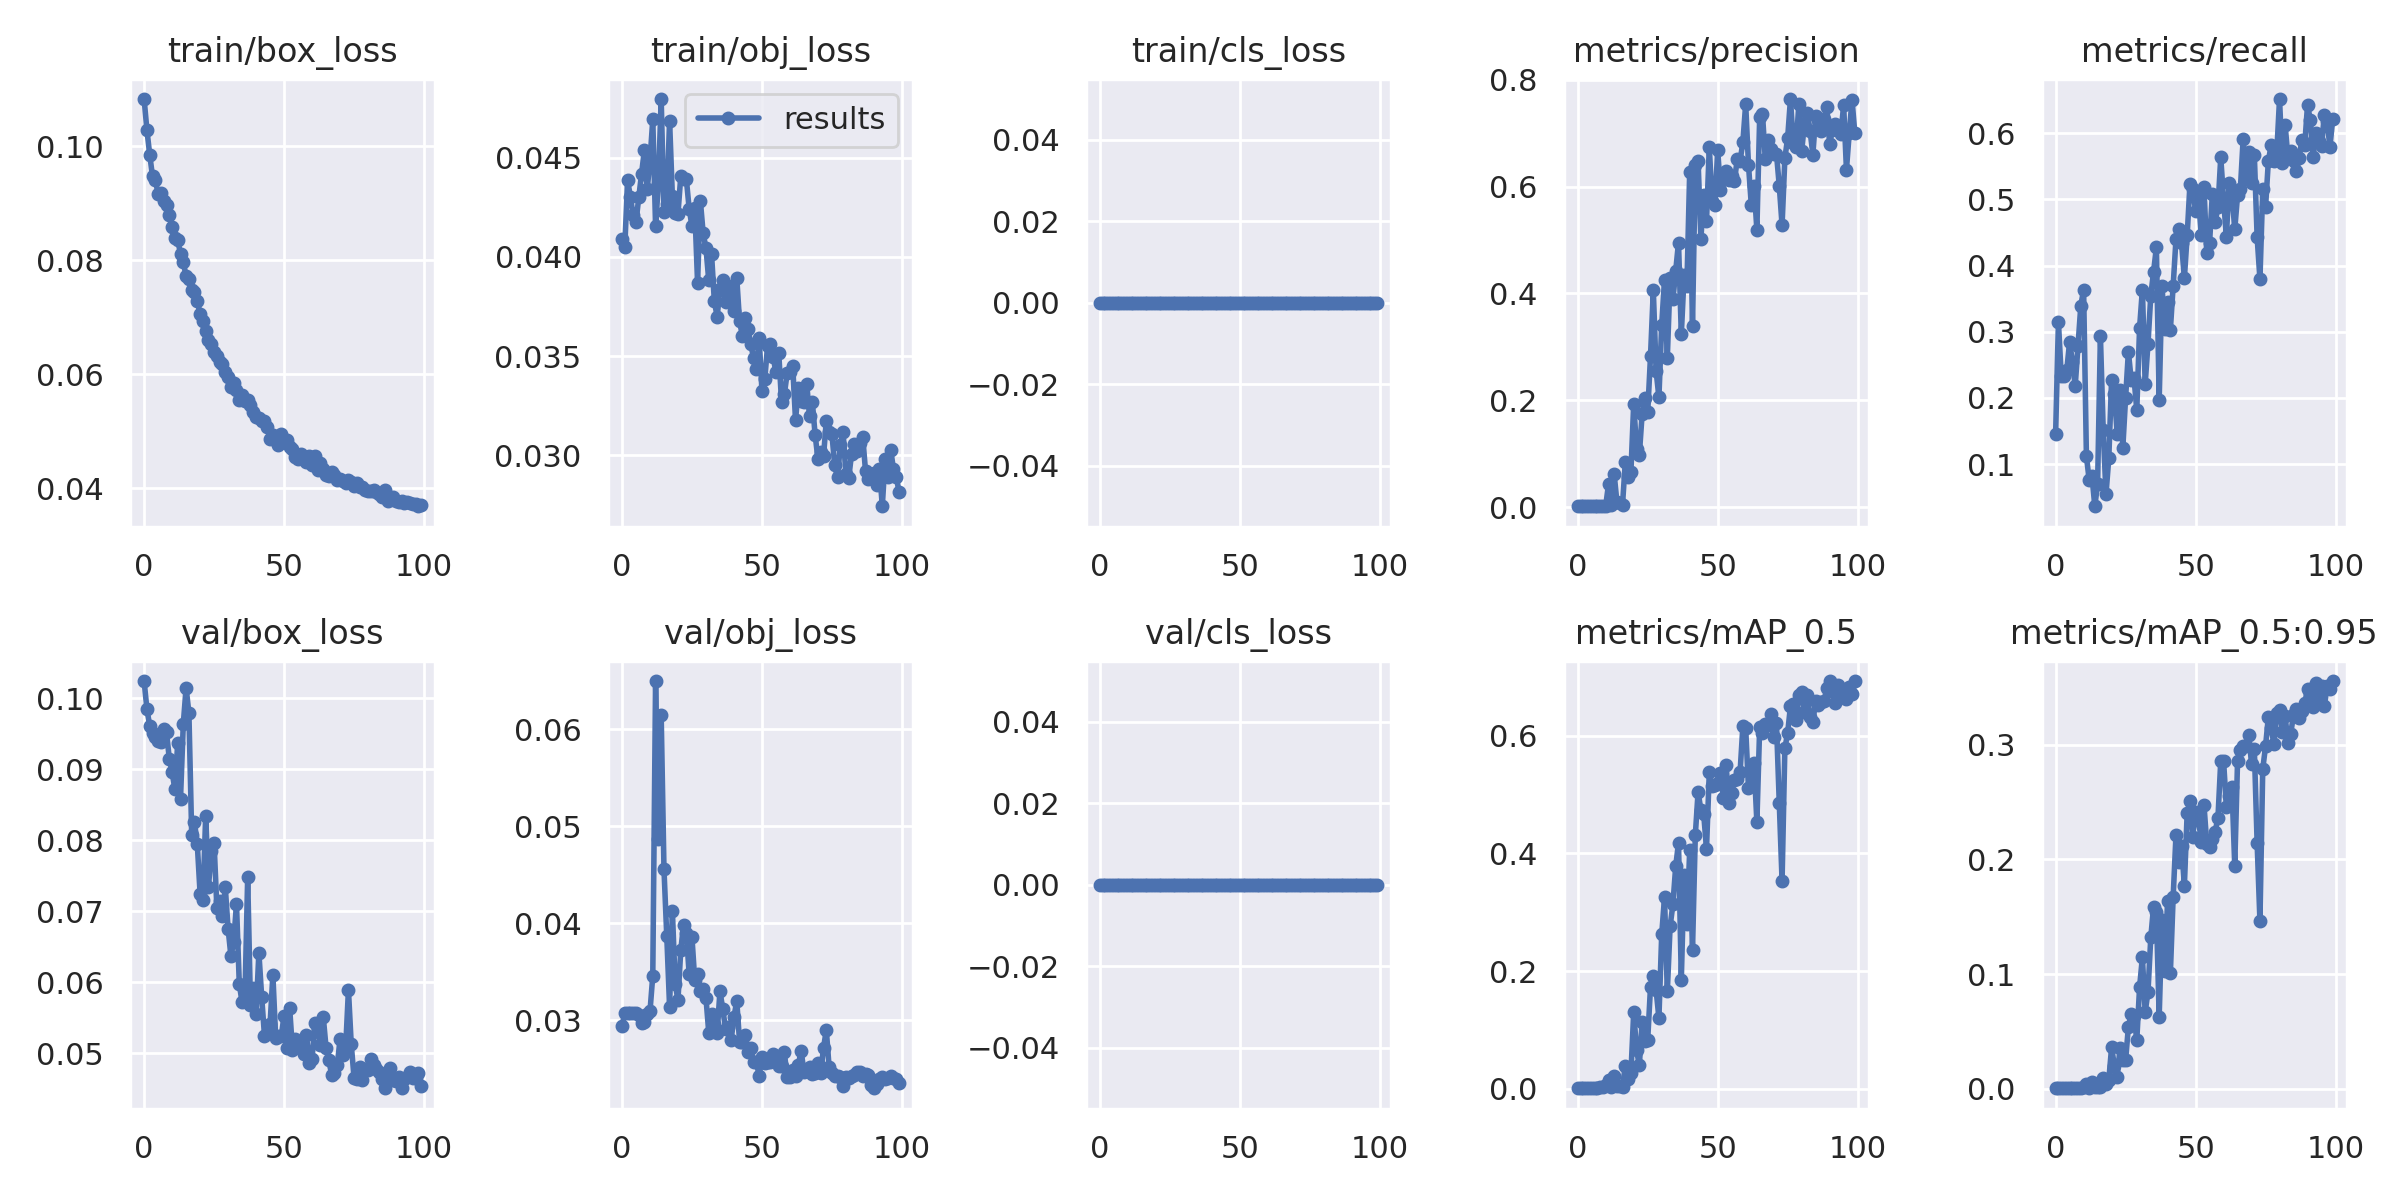

In [28]:
Image(filename='/content/yolov5/runs/train/pothole_results/results.png', width=1000)

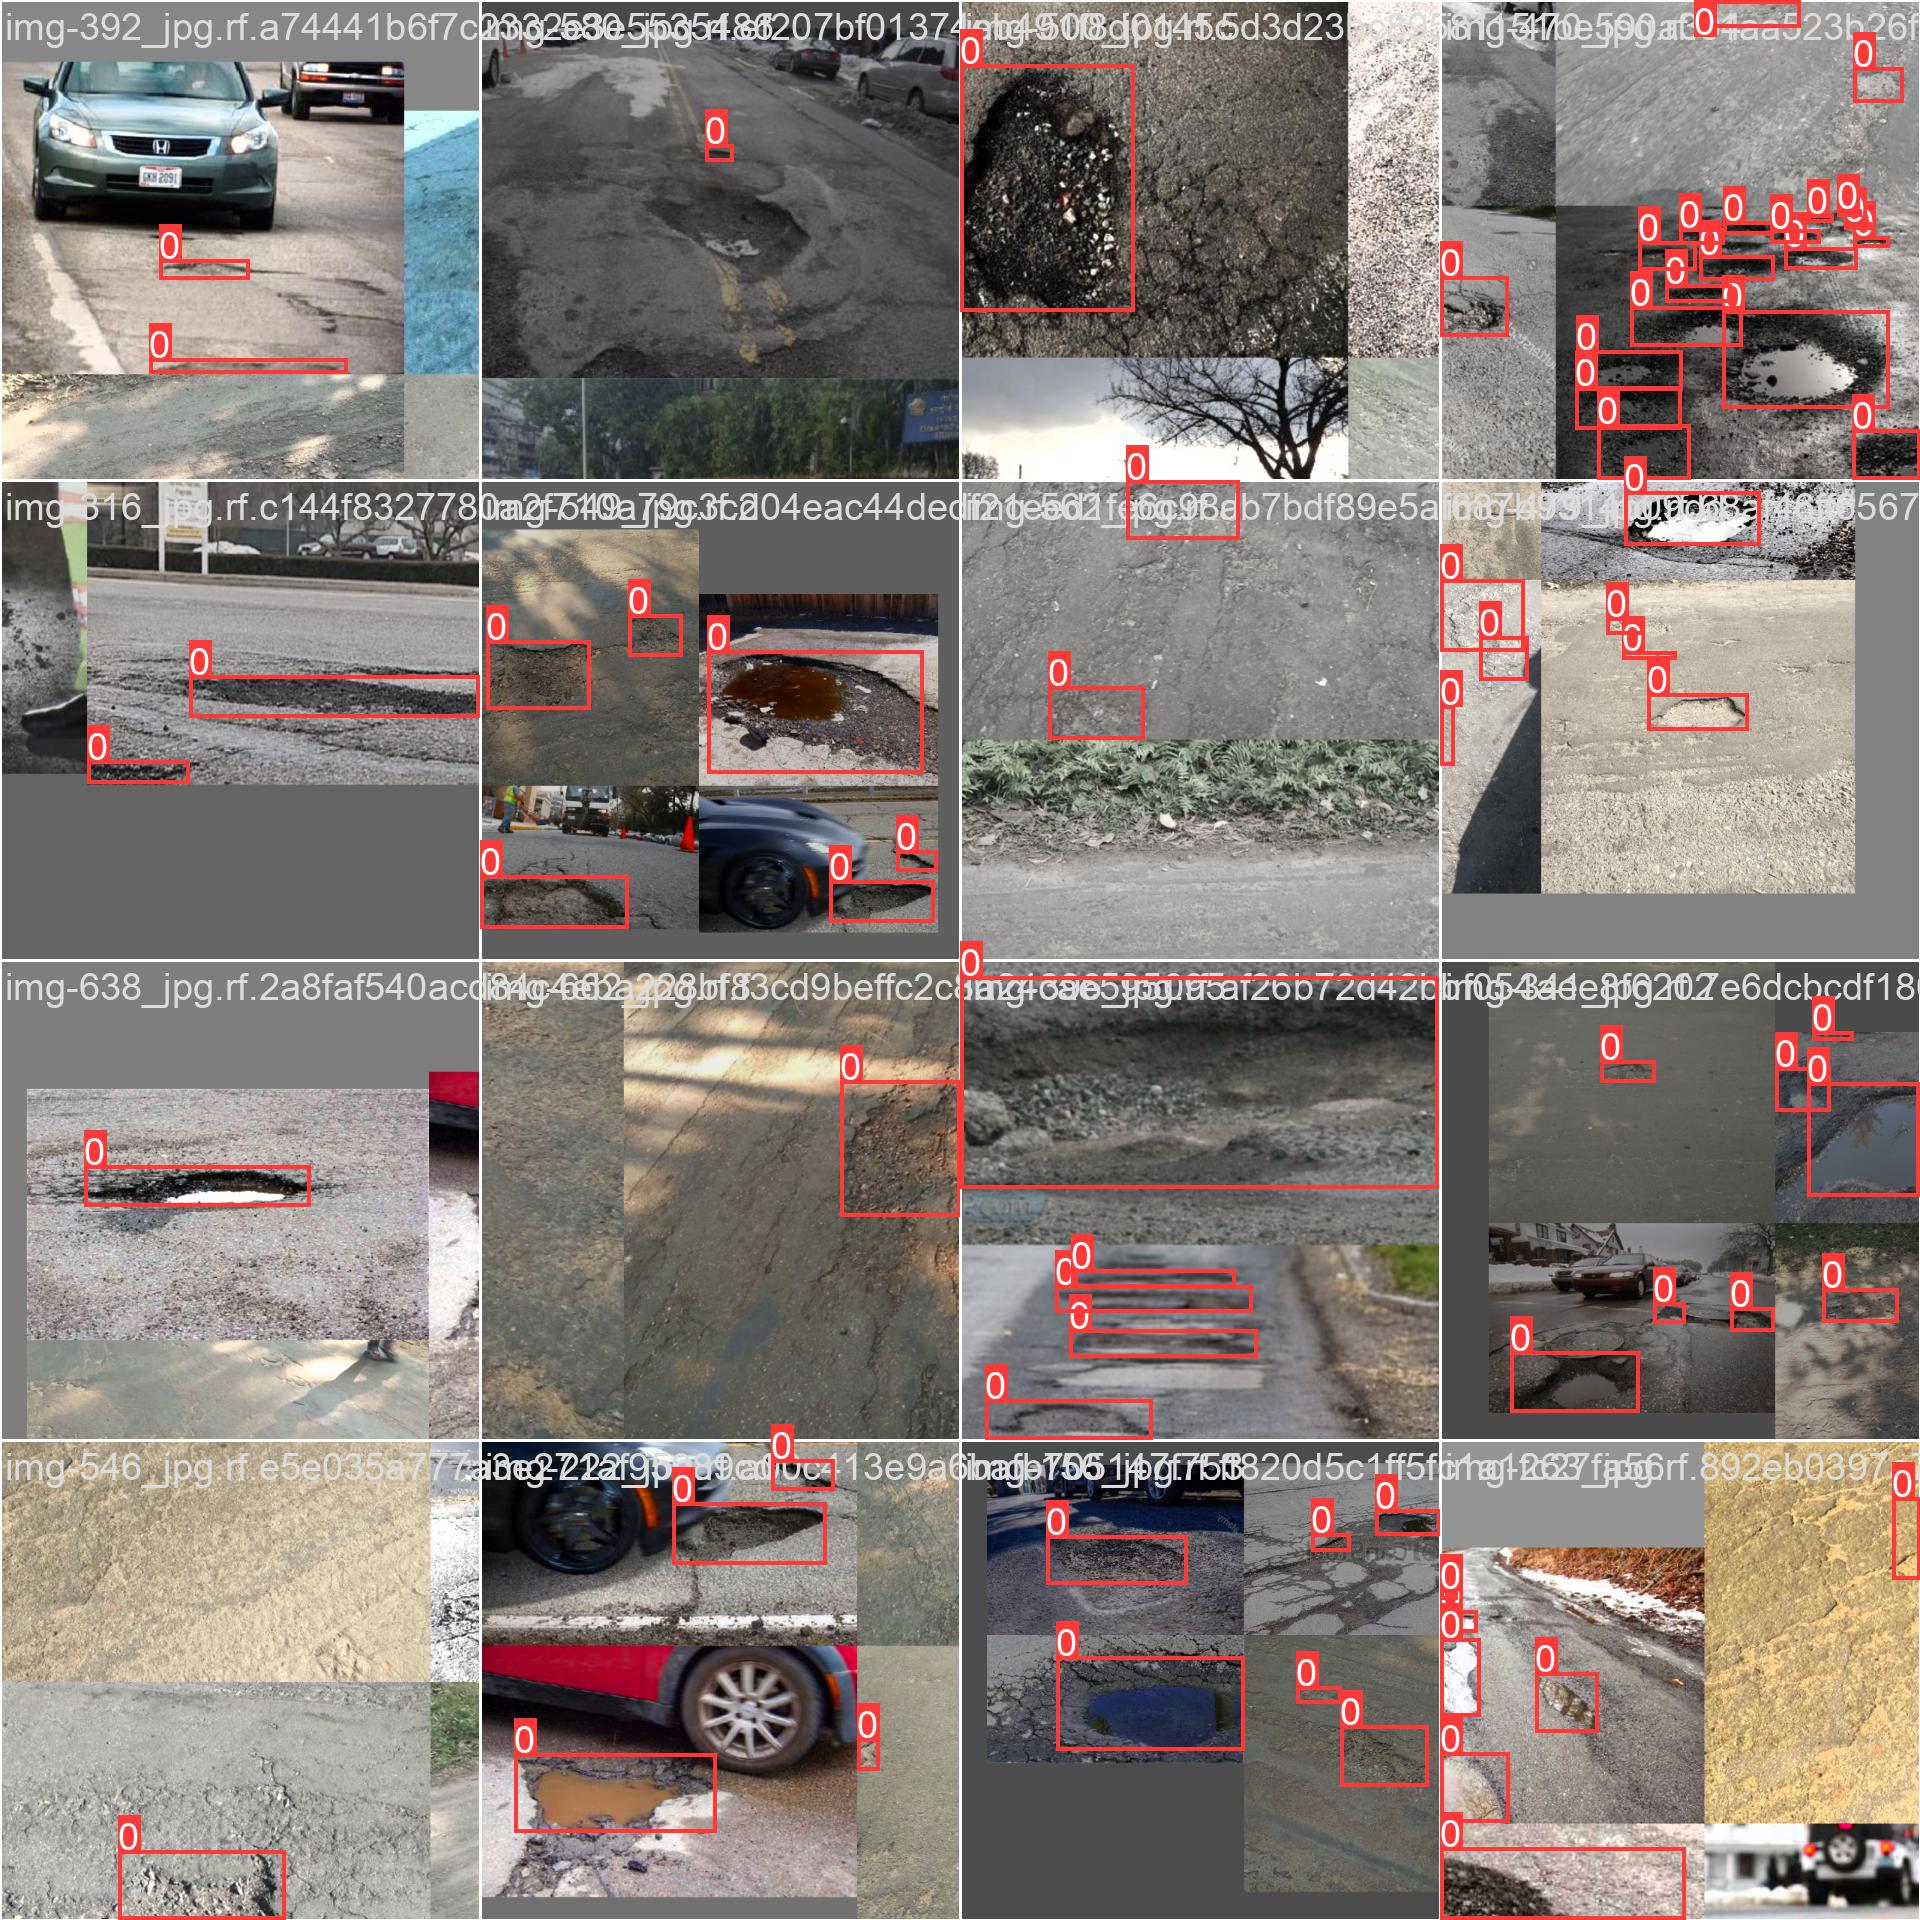

In [29]:
Image(filename='/content/yolov5/runs/train/pothole_results/train_batch0.jpg', width=1000)

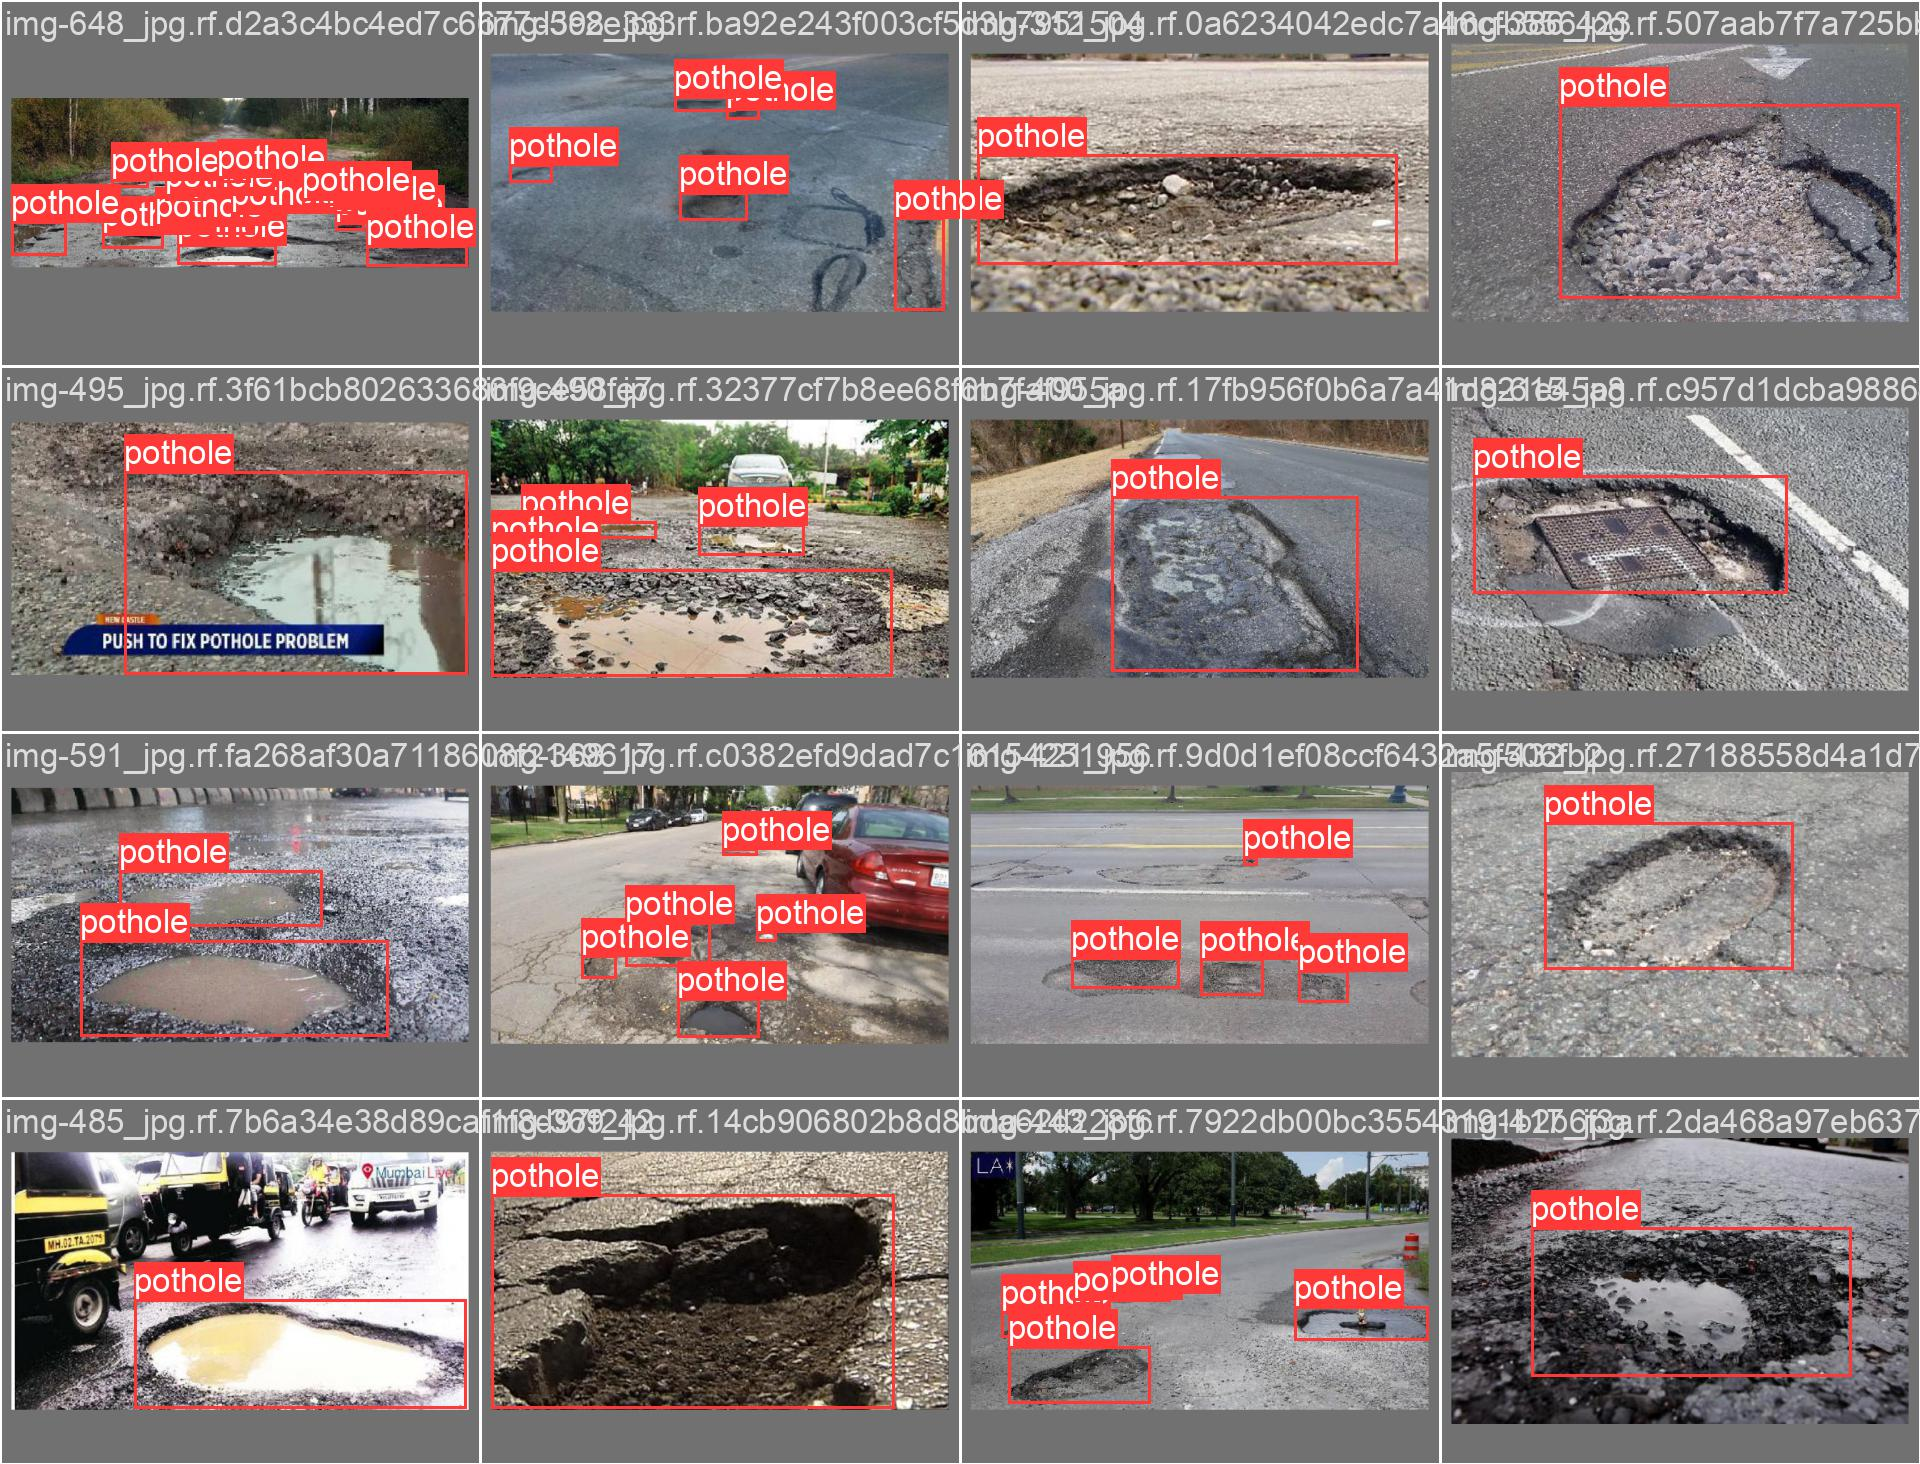

In [30]:
Image(filename='/content/yolov5/runs/train/pothole_results/val_batch0_labels.jpg', width=1000)

## Validation

In [32]:
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --iou 0.65 --half

val: data=./pothole/data.yaml, weights=['runs/train/pothole_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/pothole/valid/labels.cache... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:05<00:00,  1.16s/it]
                   all        133        330      0.715      0.608      0.687      0.357
Speed: 0.8ms pre-process, 9.5ms inference, 2.7ms NMS per image at shape (32, 3, 640, 640)
Results s

In [33]:
!python val.py --weights runs/train/pothole_results/weights/best.pt --data ./pothole/data.yaml --img 640 --task test

val: data=./pothole/data.yaml, weights=['runs/train/pothole_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/pothole/test/labels... 67 images, 0 backgrounds, 0 corrupt: 100% 67/67 [00:00<00:00, 476.23it/s]
test: New cache created: /content/yolov5/pothole/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:04<00:00,  1.37s/it]
                   all         67        154      0.781      0.636      0.697      0.373
Speed: 0.5ms pre-process, 7.8ms

## 추론(Inference)

In [37]:
%ls /content/yolov5/runs/train/pothole_results/weights

best.pt  last.pt


In [39]:
!python detect.py --weights /content/yolov5/runs/train/pothole_results/weights/best.pt --img 640 --conf 0.4 --source ./pothole/test/images

detect: weights=['/content/yolov5/runs/train/pothole_results/weights/best.pt'], source=./pothole/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/67 /content/yolov5/pothole/test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg: 640x640 1 pothole, 12.6ms
image 2/67 /content/yolov5/pothole/test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 640x640 1 pothole, 12.6ms
image 3/67 /content/yolov5/pothole/test/images/img-146_j

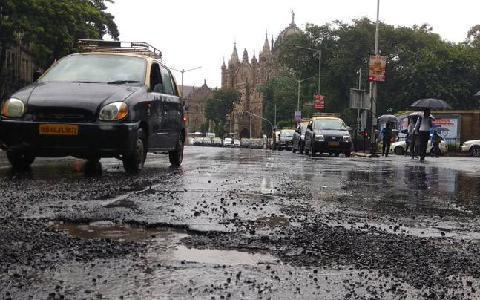

In [53]:
import glob
import random
from IPython.display import Image, display
# glob.glob에 *.jpg를 하면 현재 디렉터리의 jpg파일을 리스트에 담는다다
image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'))
display(Image(filename=image_name, width=500))

## 모델 내보내기

In [54]:
from google.colab import drive
drive.mount('/content/drive') # 구글드라이브에 마운트해서 접근함함

Mounted at /content/drive


In [59]:
%mkdir /content/drive/MyDrive/pothole
%cp /content/yolov5/runs/train/pothole_results/weights/best.pt /content/drive/MyDrive/pothole # 현재에 있는 가중치 카피

mkdir: cannot create directory ‘/content/drive/MyDrive/pothole’: File exists
